In [76]:
import numpy as np
import matplotlib.pyplot as plt

In [68]:
#création de la matrice de transistion de markov 
mat = np.array([[1,0,0],[1/4,1/2,1/4],[1/4,0,3/4]])

In [69]:
def isStockastique(mat):
    row_sum=0
    for i in range(mat.shape[0]):
        for j in range (mat.shape[1]):
            row_sum = row_sum + mat[i][j]
    if (row_sum == mat.shape[0]):
        return True
    else :
        return False

In [70]:
#verification que la matrice est stockastique
isStockastique(mat)

True

In [71]:
def findAbsState(mat):
    abs_state = []
    for i in range(mat.shape[0]):
            if mat[i][i] == 1:
                abs_state.append(i+1)
    return abs_state

In [72]:
findAbsState(mat)

[1]

In [73]:
def checkAbsState(mat,indice):
    if indice in findAbsState(mat):
        return True
    else :
        return False

In [77]:
def simulation(P, pi0, t0, tf):
    # Simulation numerique d'une chaine de Markov en temps discret
    # P	    : matrice de transition
    # pi0	: vecteur stochastique initial (a l'instant t0)
    # t0	: instant initial (debut de la simulation)
    # tf	: instant final
    # pi	: matrice des valeurs successives du vecteur stochastique
    # t     : liste des instants (t0 <= t <= tf)

    t = np.arange(t0, tf + 1)
    # controles
    if P.shape[0] != P.shape[1] | P.shape[0] != pi0.len:
        print("dimensions incorrectes")
    elif not isStockastique(P):
        print("la matrice n est pas stochastique")

    # evolution du vecteur stochastique
    pi = np.array(np.zeros((len(t), P.shape[1])))
    pi[0] = pi0
    for i in range(1, len(t)):
        pi[i] = pi[i - 1].dot(P)
    plt.plot(t, pi)
    return t, pi

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60]),
 array([[0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
        [2.50000000e-01, 0.00000000e+00, 7.50000000e-01],
        [4.37500000e-01, 0.00000000e+00, 5.62500000e-01],
        [5.78125000e-01, 0.00000000e+00, 4.21875000e-01],
        [6.83593750e-01, 0.00000000e+00, 3.16406250e-01],
        [7.62695312e-01, 0.00000000e+00, 2.37304688e-01],
        [8.22021484e-01, 0.00000000e+00, 1.77978516e-01],
        [8.66516113e-01, 0.00000000e+00, 1.33483887e-01],
        [8.99887085e-01, 0.00000000e+00, 1.00112915e-01],
        [9.24915314e-01, 0.00000000e+00, 7.50846863e-02],
        [9.43686485e-01, 0.00000000e+00, 5.63135147e-02],
        [9.57764864e-01, 0.00000000e+00, 4.22351360e-02],
        [9.68323648e-01, 0

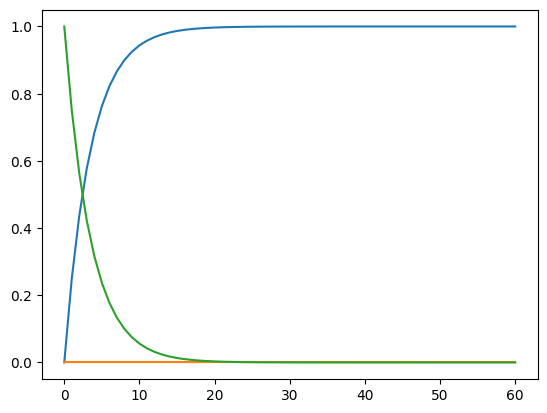

In [78]:
simulation(mat,[0,0,1],0,60)

In [27]:
def stationnaire(P):
    Id = np.eye(P.shape[0])
    TP = P.T
    m = Id - TP
    m = np.vstack([m, np.ones(P.shape[0])])
    pi = np.append(np.zeros(P.shape[0]),1)
    return np.linalg.lstsq(m, pi)[0]

    



In [28]:
stationnaire(mat)

C:\Users\Lamilaz\AppData\Local\Temp\ipykernel_22856\3732032782.py:7: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  return np.linalg.lstsq(m, pi)[0]


array([0.6, 0.1, 0.3])

Ergodicite

In [35]:
#inversible ? calculer determinant
def isInversible(mat):
    res = np.linalg.det(mat)
    if res != 0 :
        return True
    else : 
        return False

In [87]:
 mat = np.array([[1/2,1/2,0],[1/3,1/3,1/3],[1,0,0]])
 [D, V] = np.linalg.eig(mat)

In [97]:
Vinv = np.linalg.inv(V)
D = np.diag(D)

In [100]:
np.dot(np.dot(V,D), Vinv)

array([[ 5.00000000e-01+1.27216194e-16j,  5.00000000e-01+7.81774831e-20j,
        -3.12250226e-17+2.48267671e-17j],
       [ 3.33333333e-01+7.94191259e-17j,  3.33333333e-01-6.20432263e-18j,
         3.33333333e-01+1.95626475e-17j],
       [ 1.00000000e+00+1.35043170e-16j,  0.00000000e+00+1.41535158e-17j,
        -1.73472348e-16+7.24747080e-17j]])

In [98]:
D

array([[ 1.        +0.j        ,  0.        +0.j        ,
         0.        +0.j        ],
       [ 0.        +0.j        , -0.08333333+0.39965263j,
         0.        +0.j        ],
       [ 0.        +0.j        ,  0.        +0.j        ,
        -0.08333333-0.39965263j]])

In [20]:

# Définir une matrice carrée
mat = np.array([[5/6,1/12,1/12],[1/4,1/2,1/4],[1/4,0,3/4]])

# Calculer les valeurs propres (D) et les vecteurs propres (V)
D, V = np.linalg.eig(mat)

print("Valeurs propres : ",D)
print("Vecteurs propres : ",V)
print(mat)

Valeurs propres :  [1.         0.58333333 0.5       ]
Vecteurs propres :  [[-0.57735027 -0.42640143  0.30151134]
 [-0.57735027  0.63960215 -0.90453403]
 [-0.57735027  0.63960215 -0.30151134]]
[[0.83333333 0.08333333 0.08333333]
 [0.25       0.5        0.25      ]
 [0.25       0.         0.75      ]]


In [27]:
V_inv = np.linalg.inv(V)
D = np.diag(D)
np.dot(V, np.dot(D,V_inv))


array([[ 8.33333333e-01,  8.33333333e-02,  8.33333333e-02],
       [ 2.50000000e-01,  5.00000000e-01,  2.50000000e-01],
       [ 2.50000000e-01, -2.07585322e-16,  7.50000000e-01]])

In [28]:
# donc on peut mettre la mat D à la puiisance que l'in souhaite comme diagonale

In [29]:
P_n = np.dot(np.dot(V, np.linalg.matrix_power(D, 5)), V_inv)

In [32]:
np.linalg.matrix_power(D, 10000) 
#tend vers matrice à un seul coef

array([[1., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [62]:
#bonne sante vecteur initial etat 1
V_i = np.array([0.5,0.5,0])


In [63]:
def getVn(n,V,P):
    for i in range(n):
        V = np.dot(V,P)

    return V

In [67]:
getVn(1,V_i,mat)

array([0.39583333, 0.27083333, 0.33333333])

In [65]:
#changer VI
V_i = np.array([0.25,0.5,0.25])

In [66]:
getVn(5,V_i,mat)

array([0.57635975, 0.09979725, 0.32384299])

In [ ]:
#plot des valeurs en fonctions 
simulation()
